# Detecting House Prices

This project aims to predict the house prices in the future. Hence we will used to suitable data processing and feature engineering in order to increase the level of accuracy of the final model.

# Import Dependencies 



In [1]:
!pip install eli5

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import eli5
from eli5.sklearn import PermutationImportance
from sklearn import metrics

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Data Understanding

In [3]:
train_df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test_df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [4]:
train_df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
test_df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

# Duplicates

In [8]:
train_df.duplicated().any()

False

In [9]:
test_df.duplicated().any()

False

# Missing Values

In [10]:
train_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [11]:
#percentage of missing values in train_df 

missing_percentages = train_df.isnull().sum()/ len(train_df) * 100 

print(missing_percentages)

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64


In [12]:
columns_to_delete = missing_percentages[missing_percentages > 30].index

In [13]:
train_df = train_df.drop(columns=columns_to_delete)

In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

The columns that consists more than 30% missing values were removed. (train_df)

In [15]:
test_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [16]:
#percentage of missing values in test_df 

missing_percentages = test_df.isnull().sum()/ len(test_df ) * 100 

print(missing_percentages)

Id                0.000000
MSSubClass        0.000000
MSZoning          0.274160
LotFrontage      15.558602
LotArea           0.000000
                   ...    
MiscVal           0.000000
MoSold            0.000000
YrSold            0.000000
SaleType          0.068540
SaleCondition     0.000000
Length: 80, dtype: float64


In [17]:
columns_to_delete = missing_percentages[missing_percentages > 30].index

In [18]:
test_df = test_df.drop(columns=columns_to_delete)

In [19]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

# Check for skewness in numerical variables that are having missing values (train_df)

This is to identify whether we use mean or median imputation in missing value treatment.

In [20]:
numcols = train_df.select_dtypes(include=['number']).columns.tolist()

In [21]:
numcols

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [22]:
missing_values = train_df[numcols].isnull().sum()

In [23]:
columns_with_missing_values = missing_values[missing_values > 0]
print(columns_with_missing_values)

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64


In [24]:
#check the skewness LotFrontage 

train_df['LotFrontage'].skew()

2.163569142324884

In [25]:
#check the skewness MasVnrArea 

train_df['MasVnrArea'].skew()

2.669084210182863

In [26]:
#check the skewness GarageYrBlt 

train_df['GarageYrBlt'].skew()

-0.6494146238714679

Based on the skewness above, the skewness that are more than 2 means that the distribution of the data is skewed towards the right side (positive skew). Where the skewness with negative sign which means that the distribution of data is negatively skewed, left skewed. Hence, we will use median imputation on the three variables (LotFrontage, MasVnrArea & GarageYrBlt) 

# Missing Value treatment for the numerical variables in train_df 

In [27]:
#LotFrontage

median = train_df['LotFrontage'].median()

train_df['LotFrontage'].fillna(median, inplace=True)

In [28]:
#MasVnrArea

median = train_df['MasVnrArea'].median()

train_df['MasVnrArea'].fillna(median, inplace=True)

In [29]:
#GarageYrBlt

median = train_df['GarageYrBlt'].median()

train_df['GarageYrBlt'].fillna(median, inplace=True)

# Missing Value treatment for the categorical variables with Mode Imputaion (train_df)

In [30]:
catcols = train_df.select_dtypes(include=['object']).columns.tolist()

In [31]:
catcols

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [32]:
missing_values = train_df[catcols].isnull().sum()

In [33]:
cat_columns_with_missing_values = missing_values[missing_values > 0]
print(cat_columns_with_missing_values)

MasVnrType       8
BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
Electrical       1
GarageType      81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64


In [34]:
#MasVnrType
mode = train_df['MasVnrType'].mode().iloc[0]

train_df['MasVnrType'].fillna(mode, inplace=True)
     

In [35]:
#BsmtQual
mode = train_df['BsmtQual'].mode().iloc[0]

train_df['BsmtQual'].fillna(mode, inplace=True)
     

In [36]:
#BsmtCond
mode = train_df['BsmtCond'].mode().iloc[0]

train_df['BsmtCond'].fillna(mode, inplace=True)

In [37]:
#BsmtExposure
mode = train_df['BsmtExposure'].mode().iloc[0]

train_df['BsmtExposure'].fillna(mode, inplace=True)

In [38]:
#BsmtFinType1
mode = train_df['BsmtFinType1'].mode().iloc[0]

train_df['BsmtFinType1'].fillna(mode, inplace=True)

In [39]:
#BsmtFinType2
mode = train_df['BsmtFinType2'].mode().iloc[0]

train_df['BsmtFinType2'].fillna(mode, inplace=True)

In [40]:
#Electrical
mode = train_df['Electrical'].mode().iloc[0]

train_df['Electrical'].fillna(mode, inplace=True)

In [41]:
#GarageType
mode = train_df['GarageType'].mode().iloc[0]

train_df['GarageType'].fillna(mode, inplace=True)

In [42]:
#GarageFinish
mode = train_df['GarageFinish'].mode().iloc[0]

train_df['GarageFinish'].fillna(mode, inplace=True)

In [43]:
#GarageQual
mode = train_df['GarageQual'].mode().iloc[0]

train_df['GarageQual'].fillna(mode, inplace=True)

In [44]:
#GarageCond
mode = train_df['GarageCond'].mode().iloc[0]

train_df['GarageCond'].fillna(mode, inplace=True)

# Check if there is still missing values present in the Train_df

In [45]:
#check if there is still missing values
print(train_df.isnull().values.sum() !=0)

False


# Check for skewness in numerical variables that are having missing values (test_df)

In [46]:
numcols = test_df.select_dtypes(include=['number']).columns.tolist()

In [47]:
missing_values = test_df[numcols].isnull().sum()

In [48]:
columns_with_missing_values = missing_values[missing_values > 0]
print(columns_with_missing_values)

LotFrontage     227
MasVnrArea       15
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
GarageYrBlt      78
GarageCars        1
GarageArea        1
dtype: int64


In [49]:
#LotFrontage 

test_df['LotFrontage'].skew()

0.661921074378434

In [50]:
#MasVnrArea 

test_df['MasVnrArea'].skew()

2.533376725976824

In [51]:
#BsmtFinSF1 

test_df['BsmtFinSF1'].skew()

1.16567669422342

In [52]:
#BsmtFinSF2 

test_df['BsmtFinSF2'].skew()

4.04134463064927

In [53]:
#BsmtUnfSF 

test_df['BsmtUnfSF'].skew()

0.919916339164844

In [54]:
#TotalBsmtSF 

test_df['TotalBsmtSF'].skew()

0.8135891485362542

In [55]:
#BsmtFullBath 

test_df['BsmtFullBath'].skew()

0.6496980738272737

In [56]:
#BsmtHalfBath 

test_df['BsmtHalfBath'].skew()

3.7798662749477145

In [57]:
#GarageYrBlt 

test_df['GarageYrBlt'].skew()

-0.15836343452029436

In [58]:
#GarageCars 

test_df['GarageCars'].skew()

-0.10714151559186293

In [59]:
#GarageArea 

test_df['GarageArea'].skew()

0.30023886715225306

skewness(-): median imputation (negative skewed)

skewness(0): mean imputation (0 skewness)

skewness(>1): median imputation (positive skewed)

In [60]:
#LotFrontage

mean = test_df['LotFrontage'].mean()

test_df['LotFrontage'].fillna(mean, inplace=True)

In [61]:
#BsmtUnfSF

mean = test_df['BsmtUnfSF'].mean()

test_df['BsmtUnfSF'].fillna(mean, inplace=True)

In [62]:
#TotalBsmtSF

mean = test_df['TotalBsmtSF'].mean()

test_df['TotalBsmtSF'].fillna(mean, inplace=True)

In [63]:
#BsmtFullBath

mean = test_df['BsmtFullBath'].mean()

test_df['BsmtFullBath'].fillna(mean, inplace=True)

In [64]:
#GarageArea

mean = test_df['GarageArea'].mean()

test_df['GarageArea'].fillna(mean, inplace=True)

In [65]:
#MasVnrArea

median = test_df['MasVnrArea'].median()

test_df['MasVnrArea'].fillna(median, inplace=True)

In [66]:
#BsmtFinSF1

median = test_df['BsmtFinSF1'].median()

test_df['BsmtFinSF1'].fillna(median, inplace=True)

In [67]:
#BsmtFinSF2

median = test_df['BsmtFinSF2'].median()

test_df['BsmtFinSF2'].fillna(median, inplace=True)

In [68]:
#BsmtHalfBath

median = test_df['BsmtHalfBath'].median()

test_df['BsmtHalfBath'].fillna(median, inplace=True)

In [69]:
#GarageYrBlt

median = test_df['GarageYrBlt'].median()

test_df['GarageYrBlt'].fillna(median, inplace=True)

In [70]:
#GarageCars

median = test_df['GarageCars'].median()

test_df['GarageCars'].fillna(median, inplace=True)

# Mode Imputation on Categorical Variables that have missing values (test_df)

In [71]:
catcols = test_df.select_dtypes(include=['object']).columns.tolist()

In [72]:
missing_values = test_df[catcols].isnull().sum()

In [73]:
cat_columns_with_missing_values = missing_values[missing_values > 0]
print(cat_columns_with_missing_values)

MSZoning         4
Utilities        2
Exterior1st      1
Exterior2nd      1
MasVnrType      16
BsmtQual        44
BsmtCond        45
BsmtExposure    44
BsmtFinType1    42
BsmtFinType2    42
KitchenQual      1
Functional       2
GarageType      76
GarageFinish    78
GarageQual      78
GarageCond      78
SaleType         1
dtype: int64


In [74]:
#MSZoning
mode = test_df['MSZoning'].mode().iloc[0]

test_df['MSZoning'].fillna(mode, inplace=True)


In [75]:
#Utilities
mode = test_df['Utilities'].mode().iloc[0]

test_df['Utilities'].fillna(mode, inplace=True)

In [76]:
#Exterior1st
mode = test_df['Exterior1st'].mode().iloc[0]

test_df['Exterior1st'].fillna(mode, inplace=True)

In [77]:
#Exterior2nd
mode = test_df['Exterior2nd'].mode().iloc[0]

test_df['Exterior2nd'].fillna(mode, inplace=True)

In [78]:
#MasVnrType
mode = test_df['MasVnrType'].mode().iloc[0]

test_df['MasVnrType'].fillna(mode, inplace=True)

In [79]:
#BsmtQual
mode = test_df['BsmtQual'].mode().iloc[0]

test_df['BsmtQual'].fillna(mode, inplace=True)

In [80]:
#BsmtCond
mode = test_df['BsmtCond'].mode().iloc[0]

test_df['BsmtCond'].fillna(mode, inplace=True)

In [81]:
#BsmtExposure
mode = test_df['BsmtExposure'].mode().iloc[0]

test_df['BsmtExposure'].fillna(mode, inplace=True)

In [82]:
#BsmtFinType1
mode = test_df['BsmtFinType1'].mode().iloc[0]

test_df['BsmtFinType1'].fillna(mode, inplace=True)

In [83]:
#BsmtFinType2
mode = test_df['BsmtFinType2'].mode().iloc[0]

test_df['BsmtFinType2'].fillna(mode, inplace=True)

In [84]:
#KitchenQual
mode = test_df['KitchenQual'].mode().iloc[0]

test_df['KitchenQual'].fillna(mode, inplace=True)

In [85]:
#Functional
mode = test_df['Functional'].mode().iloc[0]

test_df['Functional'].fillna(mode, inplace=True)

In [86]:
#GarageType
mode = test_df['GarageType'].mode().iloc[0]

test_df['GarageType'].fillna(mode, inplace=True)

In [87]:
#GarageFinish
mode = test_df['GarageFinish'].mode().iloc[0]

test_df['GarageFinish'].fillna(mode, inplace=True)

In [88]:
#GarageQual
mode = test_df['GarageQual'].mode().iloc[0]

test_df['GarageQual'].fillna(mode, inplace=True)

In [89]:
#GarageCond
mode = test_df['GarageCond'].mode().iloc[0]

test_df['GarageCond'].fillna(mode, inplace=True)

In [90]:
#SaleType
mode = test_df['SaleType'].mode().iloc[0]

test_df['SaleType'].fillna(mode, inplace=True)

# Check if there is missing values left in test_df

In [91]:
#check if there is still missing values
print(test_df.isnull().values.sum() !=0)

False


In [92]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1459 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

# Calculate count, mean, std, min, 25%, 50%, 75%, max values for each column. Prepare an analysis of the difference between mean and median for each column and possible reasons for the same.

In [93]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [94]:
test_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,...,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,99.673749,439.142906,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,20.561228,4955.517327,1.436812,1.113740,30.390071,21.130467,177.001792,455.117812,...,216.974165,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,60.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,68.580357,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,78.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,162.000000,752.000000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


# EDA 

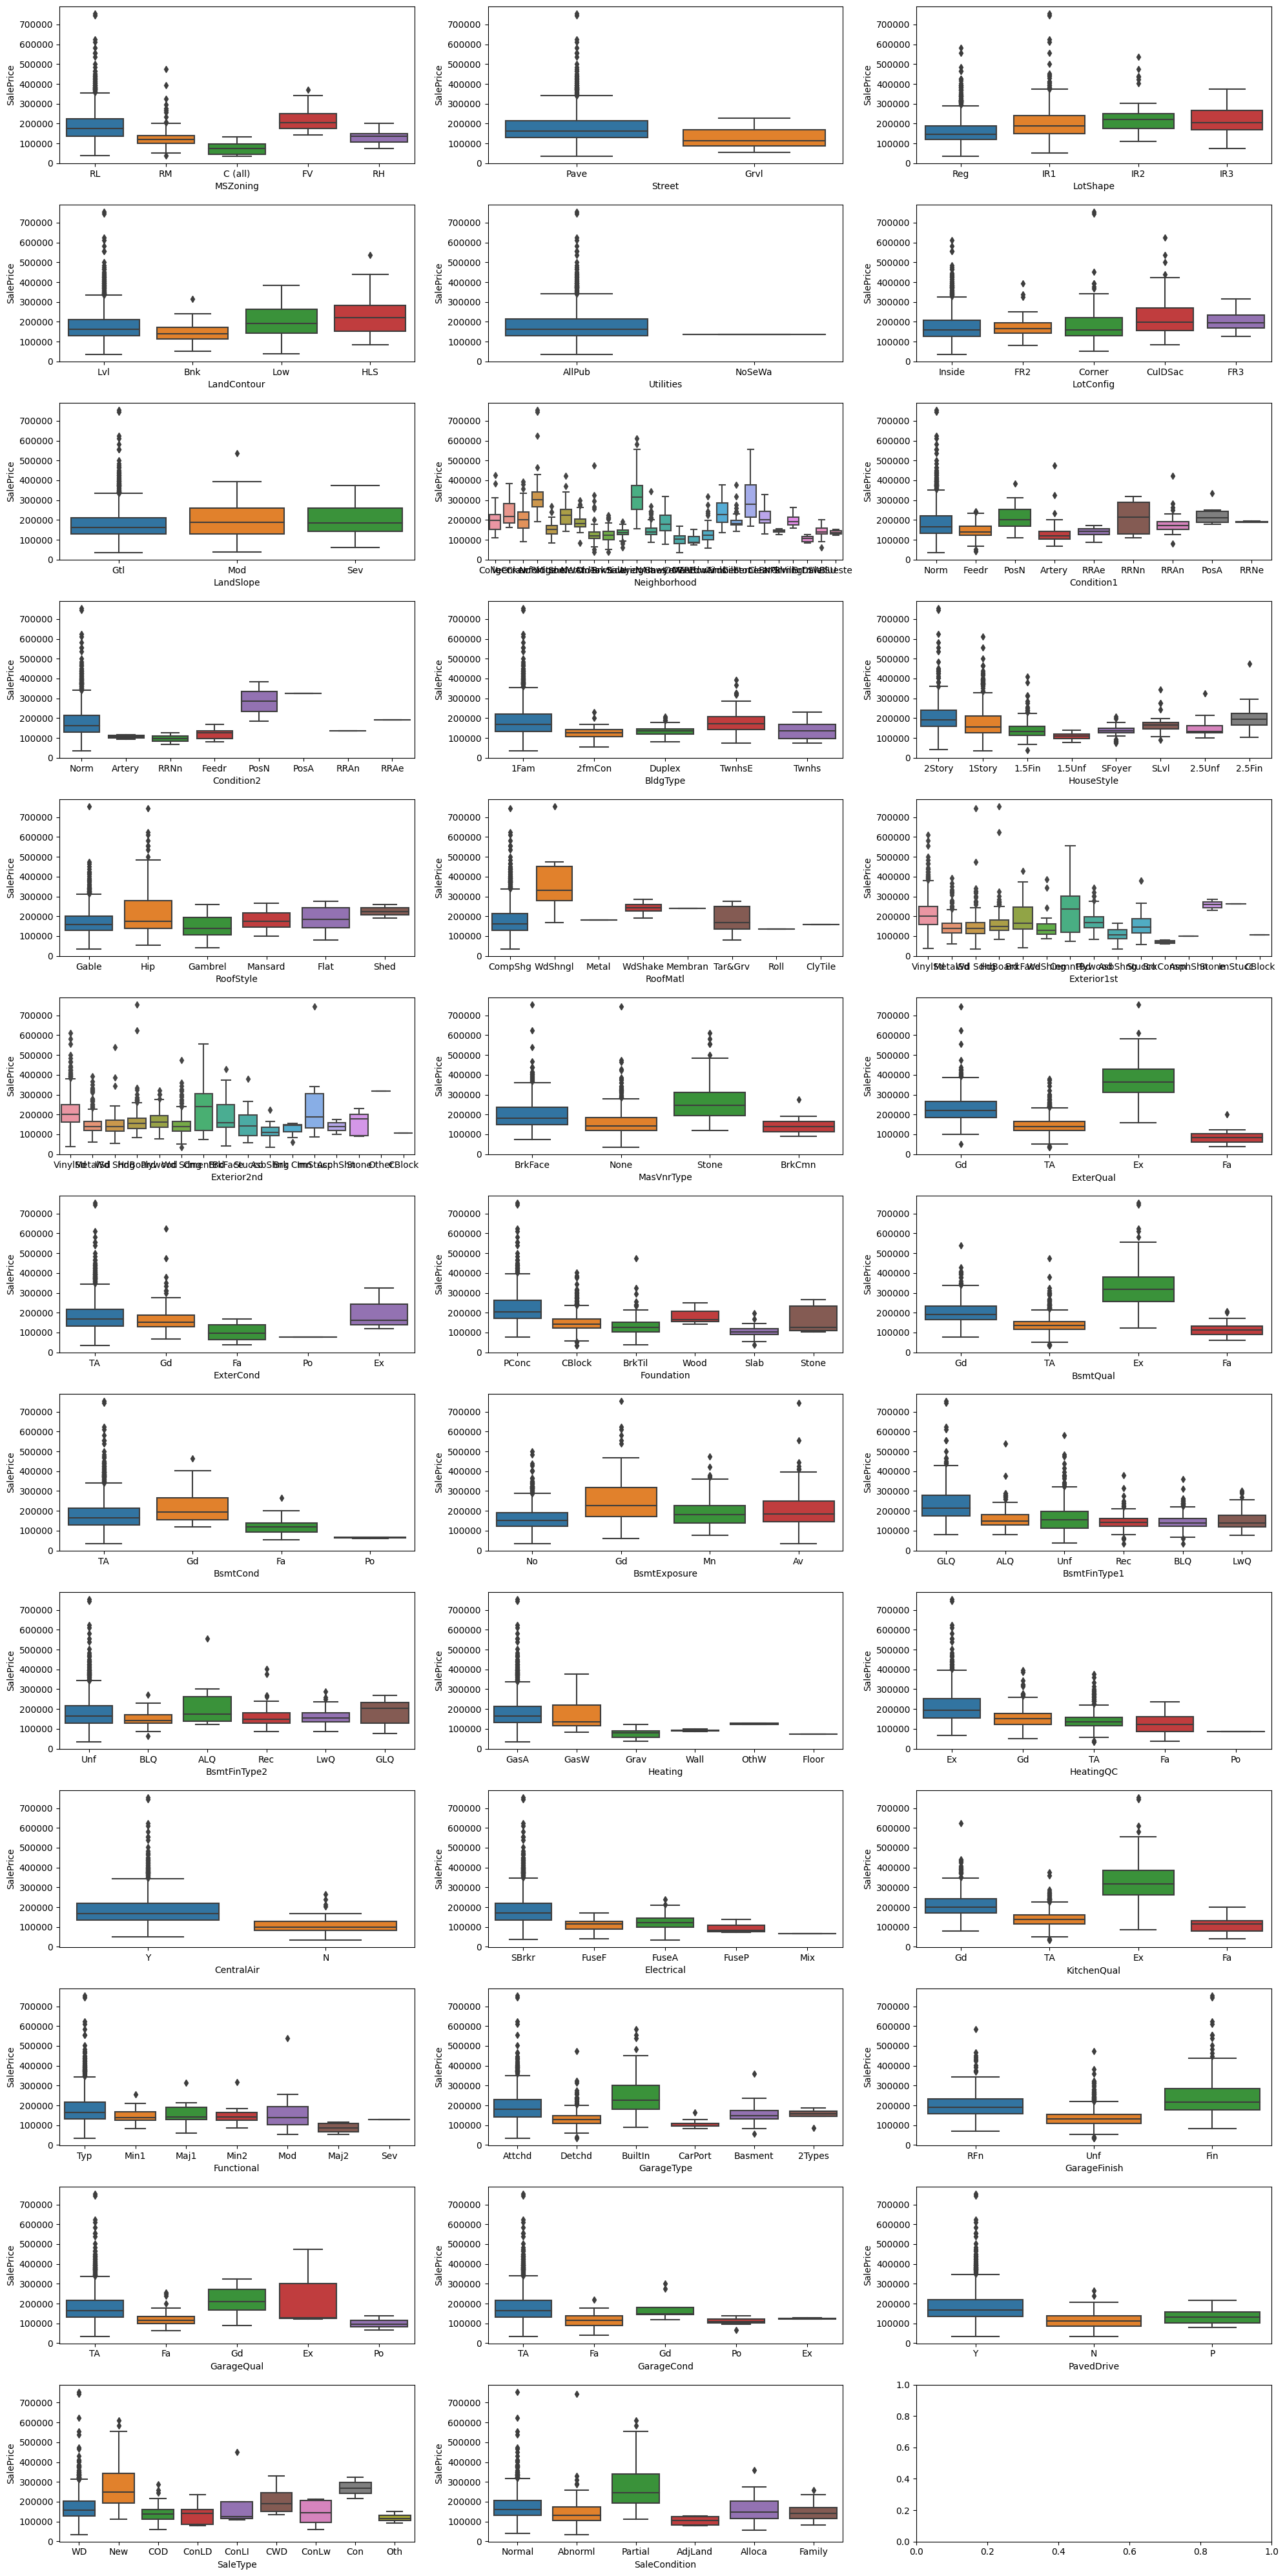

In [95]:
#Boxplot for all the categorical variables 

# Define the number of rows and columns for the grid
rows = 13
cols = 3

# Create a list of all categorical variable names
categorical_vars = train_df.select_dtypes(include='object').columns.tolist()

# Create a new figure and axis objects
fig, axes = plt.subplots(rows, cols, figsize=(20, 40))

# Flatten the axes array
axes = axes.flatten()

# Iterate over the categorical variables and create boxplots in the grid
for i, var in enumerate(categorical_vars):
    sns.boxplot(x=var, y='SalePrice', data=train_df, ax=axes[i])
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('SalePrice')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

In [96]:
#Look into the variables that have only two values. 

# Identify variables with only two unique values
binary_vars = [col for col in train_df.columns if train_df[col].nunique() == 2]

# Display the number of occurrences of unique values for binary variables
for col in binary_vars:
    value_counts = train_df[col].value_counts()
    print(f"{col}:\n{value_counts}")


Street:
Pave    1454
Grvl       6
Name: Street, dtype: int64
Utilities:
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
CentralAir:
Y    1365
N      95
Name: CentralAir, dtype: int64


In [97]:
#remove street and utilities because it does not give much impact to the prediction.. (train_df)

del train_df['Street']
del train_df['Utilities']

In [98]:
#remove street and utilities in test_df

del test_df['Street']
del test_df['Utilities']


In [99]:
#Now check other variables that have more than 3 unique values  
#I will use the Kruskal-Wallis test to select the top 5 variables with more significant difference 

more_than_3_vars = [col for col in train_df.columns if train_df[col].nunique() > 3]

categorical_3_vars = [col for col in more_than_3_vars if train_df[col].dtype == 'object']
print(categorical_vars)


['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


The Kruskal-Wallis test is a non-parametric statistical test used to compare the medians of two or more independent groups when the dependent variable is ordinal or continuous but not normally distributed. It is an extension of the Mann-Whitney U test (for two groups) to more than two groups.

In [100]:
# Perform Kruskal-Wallis test on each variable
for var in categorical_3_vars:
    groups = []
    for category in train_df['SalePrice'].unique():
        group = train_df[train_df['SalePrice'] == category][var]
        groups.append(group)
    
    # Perform Kruskal-Wallis test
    _, p_value = stats.kruskal(*groups)
    
    print(f"Variable: {var}")
    print(f"Kruskal-Wallis p-value: {p_value}\n")


Variable: MSZoning
Kruskal-Wallis p-value: 0.0034195248526033123

Variable: LotShape
Kruskal-Wallis p-value: 0.0005188917016232324

Variable: LandContour
Kruskal-Wallis p-value: 0.24345496263758692

Variable: LotConfig
Kruskal-Wallis p-value: 0.6659195150225248

Variable: Neighborhood
Kruskal-Wallis p-value: 0.03028952310106746

Variable: Condition1
Kruskal-Wallis p-value: 0.9675622571308475

Variable: Condition2
Kruskal-Wallis p-value: 0.805916304811318

Variable: BldgType
Kruskal-Wallis p-value: 0.5595349362357246

Variable: HouseStyle
Kruskal-Wallis p-value: 0.24944316814766826

Variable: RoofStyle
Kruskal-Wallis p-value: 0.03610366623690324

Variable: RoofMatl
Kruskal-Wallis p-value: 0.952513928871257

Variable: Exterior1st
Kruskal-Wallis p-value: 0.8047390122908504

Variable: Exterior2nd
Kruskal-Wallis p-value: 0.641231232856057

Variable: MasVnrType
Kruskal-Wallis p-value: 0.022029824264271514

Variable: ExterQual
Kruskal-Wallis p-value: 6.528829384193985e-19

Variable: ExterCond

In [101]:
#Pick the p-value that is significant (<0.05)

In [102]:
significant_vars = []

# Perform Kruskal-Wallis test on each variable
for var in categorical_3_vars:
    groups = []
    for category in train_df['SalePrice'].unique():
        group = train_df[train_df['SalePrice'] == category][var]
        groups.append(group)
    
    # Perform Kruskal-Wallis test
    _, p_value = stats.kruskal(*groups)
    
    if p_value < 0.05:
        significant_vars.append(var)

# Sort the significant_vars based on their p-values
significant_vars.sort(key=lambda x: stats.kruskal(*[train_df[train_df['SalePrice'] == category][x] for category in train_df['SalePrice'].unique()])[1])

# Choose the top 5 variables
top_5_vars = significant_vars[:5]

print("Top 5 variables:")
print(top_5_vars)

Top 5 variables:
['ExterQual', 'KitchenQual', 'BsmtQual', 'SaleCondition', 'SaleType']


In [103]:
#Correlation 

train_df.corr()

/tmp/ipykernel_20/2288120894.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_df.corr()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.009921,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.051071,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.356718,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.009921,-0.356718,1.000000,0.304522,0.234812,-0.053281,0.116685,0.083348,0.178469,0.214367,...,0.075542,0.137014,0.010287,0.061945,0.037655,0.180819,-0.000255,0.010451,0.006380,0.334771
LotArea,-0.033226,-0.139781,0.304522,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.234812,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.053281,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.116685,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.083348,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.051071,0.023573,0.178469,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,...,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,-0.008317,0.472614
BsmtFinSF1,-0.005024,-0.069836,0.214367,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


/tmp/ipykernel_20/1375733732.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_df.corr(),annot=True, linewidth=.7)


<AxesSubplot: >

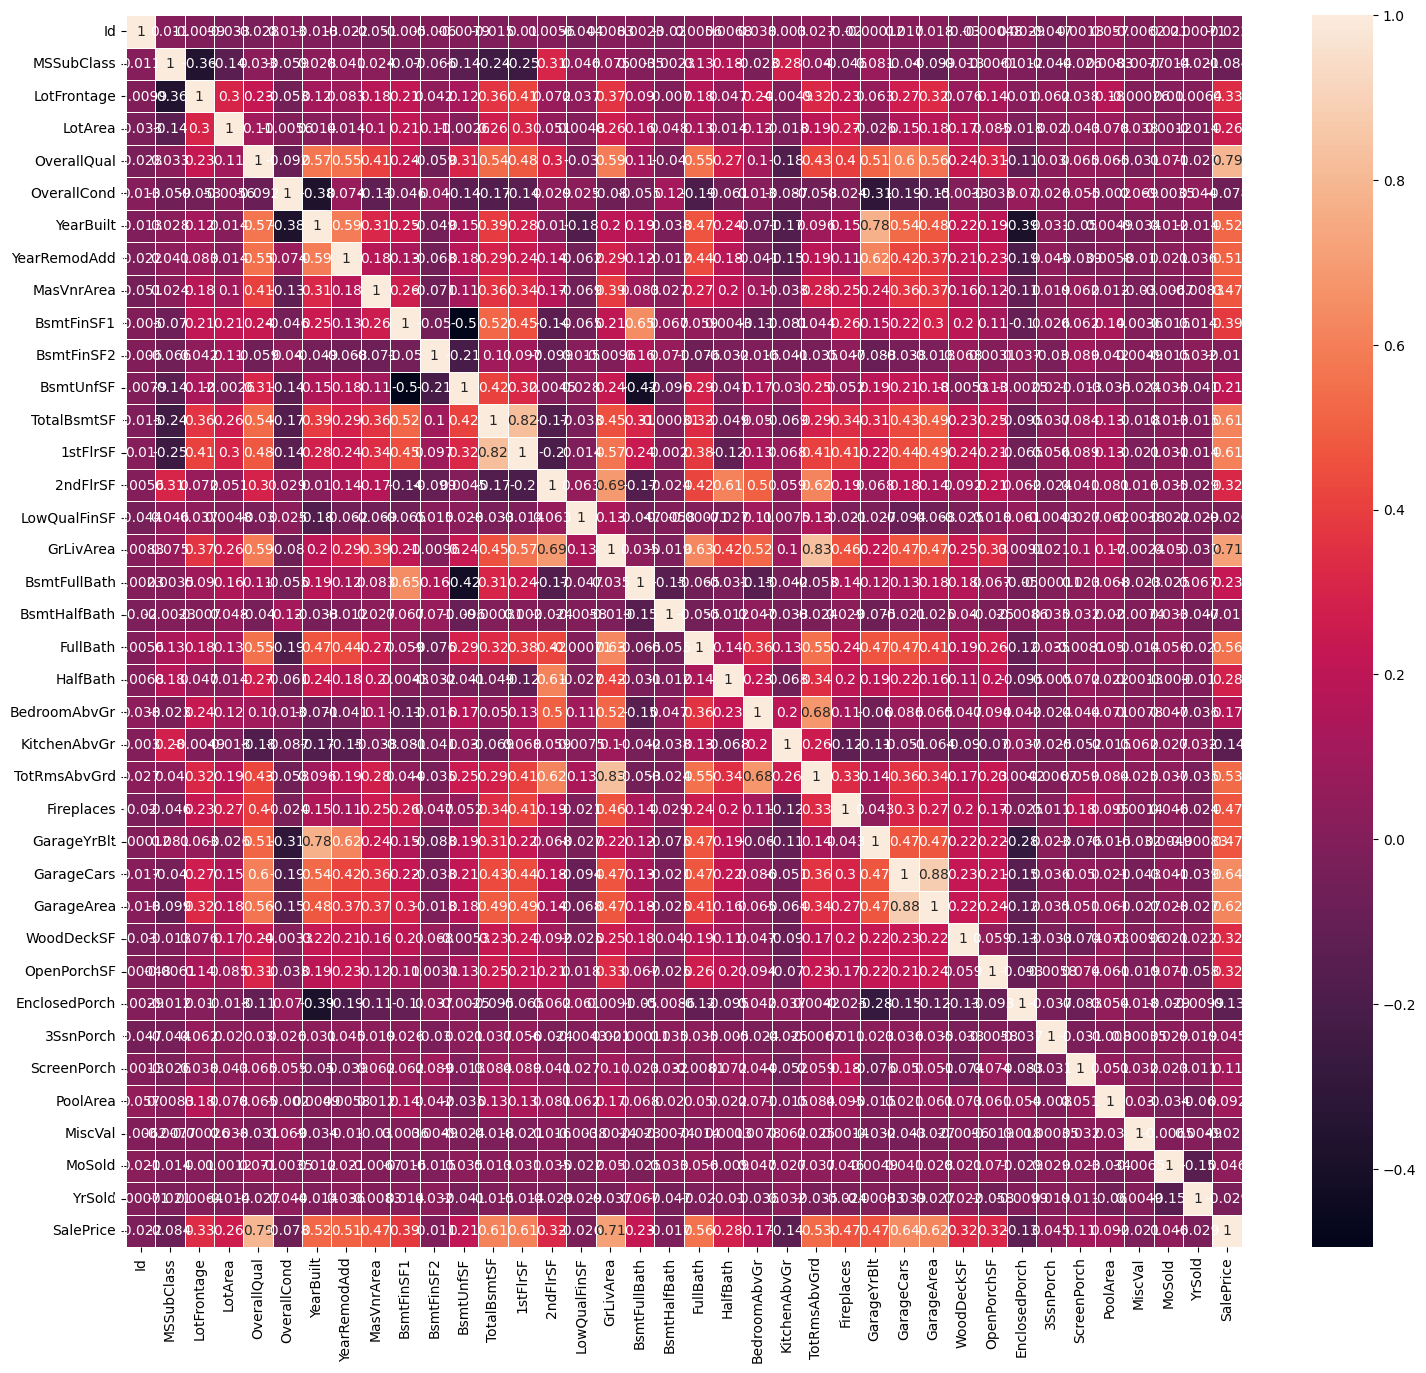

In [104]:
plt.figure(figsize= (18,16))
sns.heatmap(train_df.corr(),annot=True, linewidth=.7)

In [105]:
#Now store the independent variables that are highly correlated with the target variable

In [106]:
corr = train_df.corr()

highly_corr_var = corr.index[abs(corr['SalePrice'])>0.50]

/tmp/ipykernel_20/534202739.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train_df.corr()


In [107]:
highly_corr_var

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice'],
      dtype='object')

<AxesSubplot: >

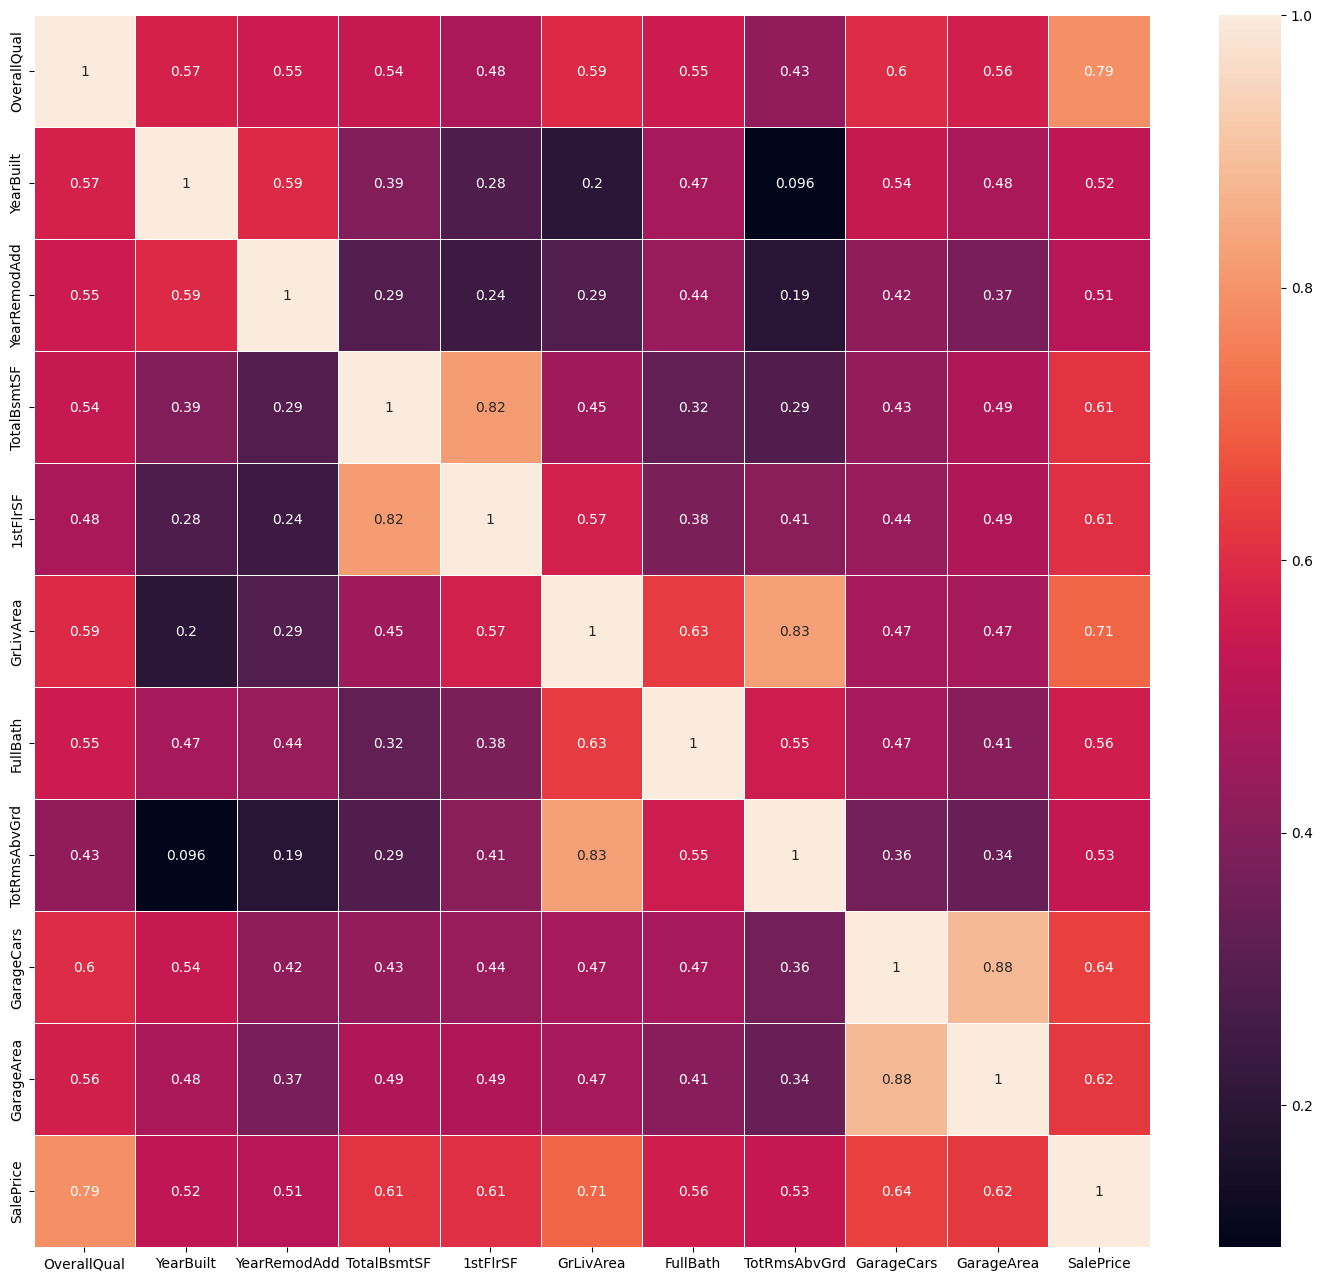

In [108]:
plt.figure(figsize= (18,16))
sns.heatmap(train_df[highly_corr_var].corr(),annot=True, linewidth=.7)

#remove the features that are more than 0.70 

TotalBsmtSF = 1stFIrSF 

GrLivArea = TotRmsAbvGrd 

GarageArea = GarageCars    

Hence i will del columns TotalBsmtSF, GrLivArea and GarageCars 

In [109]:
del train_df['TotalBsmtSF']
del train_df['GrLivArea']
del train_df['GarageCars']

In [110]:
#final train_df 

train_df = train_df[['Id','OverallQual', 'YearBuilt', 'YearRemodAdd', '1stFlrSF'
                     , 'FullBath', 'TotRmsAbvGrd', 'GarageArea','SalePrice',
                     'ExterQual', 'KitchenQual', 'BsmtQual', 'SaleCondition', 'SaleType','CentralAir']]

In [111]:
#final test_df 

test_df = test_df[['Id','OverallQual', 'YearBuilt', 'YearRemodAdd', '1stFlrSF'
                     , 'FullBath', 'TotRmsAbvGrd', 'GarageArea','ExterQual', 'KitchenQual', 
                   'BsmtQual', 'SaleCondition', 'SaleType','CentralAir']]


# Feature Scaling (train_df) 

<AxesSubplot: >

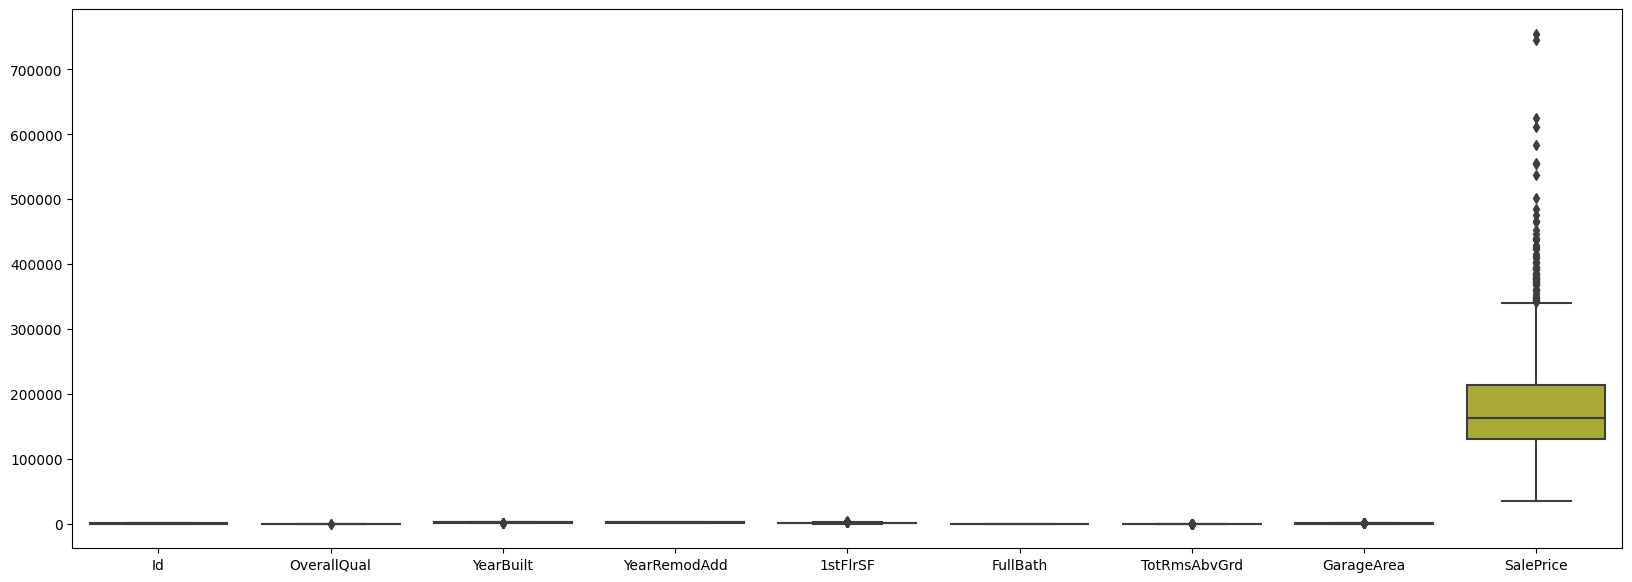

In [112]:
#Checking the Ranges of the predictor variables and dependent variable
plt.figure(figsize=(20,7))
sns.boxplot(data=train_df)

In [113]:
#Min-max Normalization 

scaler = MinMaxScaler()

num_cols = [col for col in train_df.columns if train_df[col].dtype in ['int64', 'float64']]

for col in num_cols:
    train_df[col] = scaler.fit_transform(train_df[[col]])

In [114]:
#Min-max Normalization 

#scaler = MinMaxScaler()
#num_cols = [col for col in train_df.columns if col != 'Id' and train_df[col].dtype in ['int64', 'float64']]

#for col in num_cols:
  #  train_df[col] = scaler.fit_transform(train_df[[col]])


<AxesSubplot: >

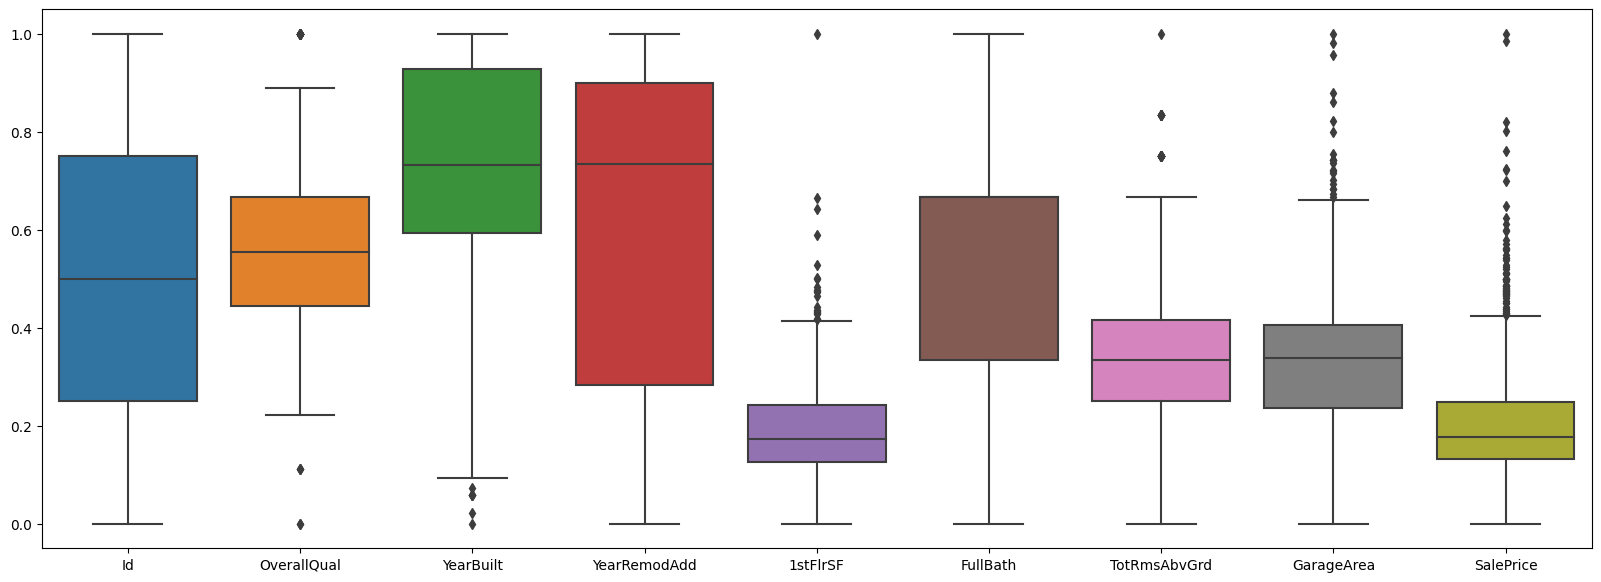

In [115]:
#Checking the Ranges of the predictor variables and dependent variable
plt.figure(figsize=(20,7))
sns.boxplot(data=train_df)

# Outlier treatment for train_df 

In [116]:
col_name = 'OverallQual'

def remove_outliers(train_df, col_name):
    q1 = train_df[col_name].quantile(0.25)
    q3 = train_df[col_name].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    train_df = train_df[(train_df[col_name] >= lower_bound) & (train_df[col_name] <= upper_bound)]
    return train_df

train_df = remove_outliers(train_df, col_name)

In [117]:
col_name = '1stFlrSF'

def remove_outliers(train_df, col_name):
    q1 = train_df[col_name].quantile(0.25)
    q3 = train_df[col_name].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    train_df = train_df[(train_df[col_name] >= lower_bound) & (train_df[col_name] <= upper_bound)]
    return train_df

train_df = remove_outliers(train_df, col_name)

In [118]:
col_name = 'TotRmsAbvGrd'

def remove_outliers(train_df, col_name):
    q1 = train_df[col_name].quantile(0.25)
    q3 = train_df[col_name].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    train_df = train_df[(train_df[col_name] >= lower_bound) & (train_df[col_name] <= upper_bound)]
    return train_df

train_df = remove_outliers(train_df, col_name)

In [119]:
col_name = 'GarageArea'

def remove_outliers(train_df, col_name):
    q1 = train_df[col_name].quantile(0.25)
    q3 = train_df[col_name].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    train_df = train_df[(train_df[col_name] >= lower_bound) & (train_df[col_name] <= upper_bound)]
    return train_df

train_df = remove_outliers(train_df, col_name)

# Feature Scaling (test_df)

<AxesSubplot: >

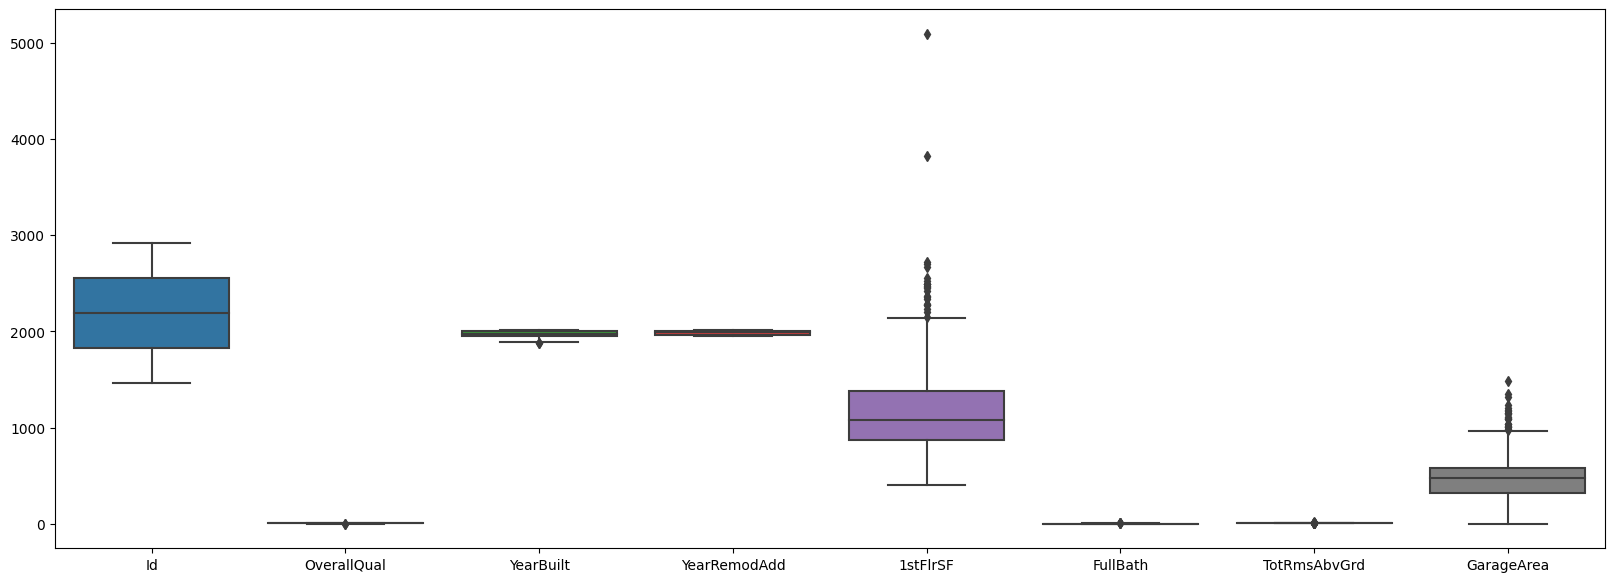

In [120]:
#Checking the Ranges of the predictor variables and dependent variable
plt.figure(figsize=(20,7))
sns.boxplot(data=test_df)

In [121]:
#Min-max Normalization 

scaler = MinMaxScaler()

num_cols = [col for col in test_df.columns if col != 'Id' and test_df[col].dtype in ['int64', 'float64']]

for col in num_cols:
    test_df[col] = scaler.fit_transform(test_df[[col]])

<AxesSubplot: >

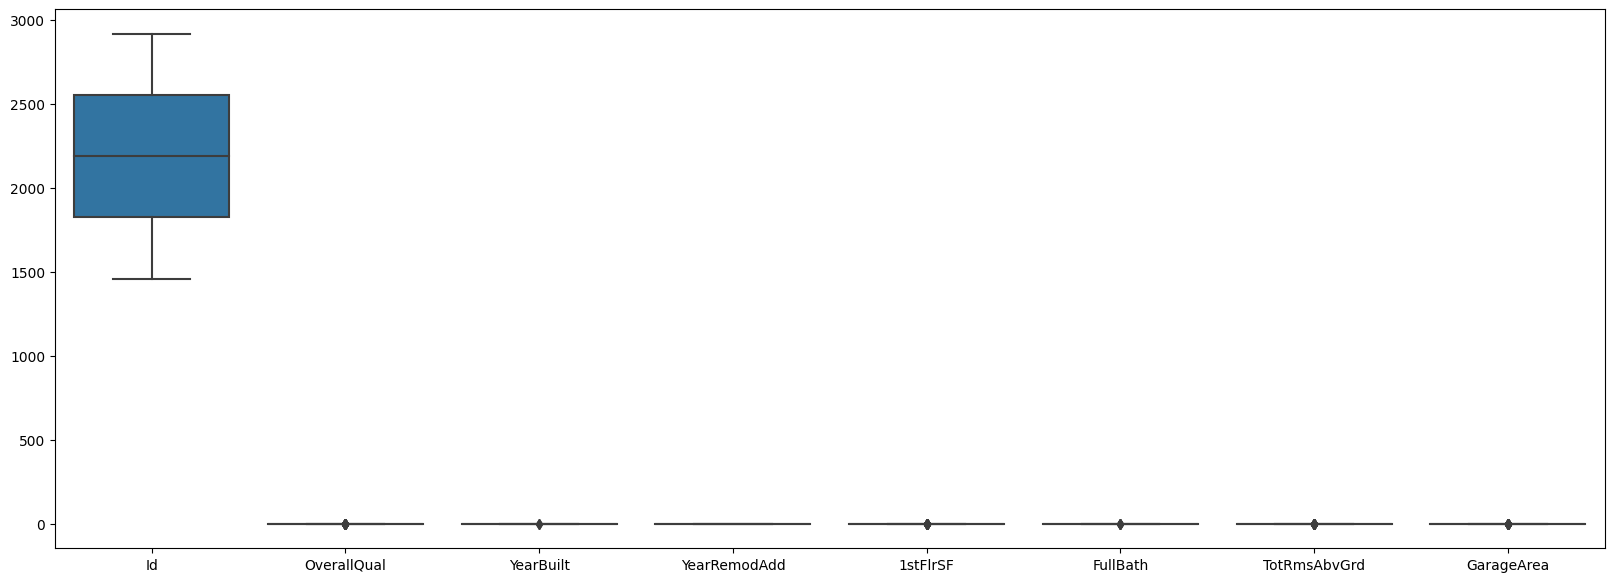

In [122]:
#Checking the Ranges of the predictor variables and dependent variable
plt.figure(figsize=(20,7))
sns.boxplot(data=test_df)

In [123]:
test_df.shape

(1459, 14)

In [124]:
train_df.shape

(1385, 15)

# Label Encoding on Categorical Variables of Train_df 

In [125]:
#categorical variables
catcols = train_df.select_dtypes(include=['object']).columns.tolist()
catcols

['ExterQual',
 'KitchenQual',
 'BsmtQual',
 'SaleCondition',
 'SaleType',
 'CentralAir']

In [126]:
#ExterQual

label_encoder = preprocessing.LabelEncoder()
  
train_df['ExterQual']= label_encoder.fit_transform(train_df['ExterQual'])
  
train_df['ExterQual'].unique()
     

array([2, 3, 0, 1])

In [127]:
#KitchenQual

label_encoder = preprocessing.LabelEncoder()
  
train_df['KitchenQual']= label_encoder.fit_transform(train_df['KitchenQual'])
  
train_df['KitchenQual'].unique()
     

array([2, 3, 1, 0])

In [128]:
#BsmtQual

label_encoder = preprocessing.LabelEncoder()
  
train_df['BsmtQual']= label_encoder.fit_transform(train_df['BsmtQual'])
  
train_df['BsmtQual'].unique()

array([2, 3, 0, 1])

In [129]:
#SaleCondition

label_encoder = preprocessing.LabelEncoder()
  
train_df['SaleCondition']= label_encoder.fit_transform(train_df['SaleCondition'])
  
train_df['SaleCondition'].unique()

array([4, 0, 5, 1, 2, 3])

In [130]:
#SaleType

label_encoder = preprocessing.LabelEncoder()
  
train_df['SaleType']= label_encoder.fit_transform(train_df['SaleType'])
  
train_df['SaleType'].unique()

array([8, 6, 0, 3, 4, 1, 5, 2, 7])

In [131]:
#CentralAir

label_encoder = preprocessing.LabelEncoder()
  
train_df['CentralAir']= label_encoder.fit_transform(train_df['CentralAir'])
  
train_df['CentralAir'].unique()

array([1, 0])

# Label Encoding on Categorical Variables of Test_df

In [132]:
#categorical variables
catcols = test_df.select_dtypes(include=['object']).columns.tolist()
catcols

['ExterQual',
 'KitchenQual',
 'BsmtQual',
 'SaleCondition',
 'SaleType',
 'CentralAir']

In [133]:
#ExterQual

label_encoder = preprocessing.LabelEncoder()
  
test_df['ExterQual']= label_encoder.fit_transform(test_df['ExterQual'])
  
test_df['ExterQual'].unique()

array([3, 2, 0, 1])

In [134]:
#KitchenQual

label_encoder = preprocessing.LabelEncoder()
  
test_df['KitchenQual']= label_encoder.fit_transform(test_df['KitchenQual'])
  
test_df['KitchenQual'].unique()

array([3, 2, 0, 1])

In [135]:
#BsmtQual

label_encoder = preprocessing.LabelEncoder()
  
test_df['BsmtQual']= label_encoder.fit_transform(test_df['BsmtQual'])
  
test_df['BsmtQual'].unique()

array([3, 2, 0, 1])

In [136]:
#SaleCondition

label_encoder = preprocessing.LabelEncoder()
  
test_df['SaleCondition']= label_encoder.fit_transform(test_df['SaleCondition'])
  
test_df['SaleCondition'].unique()

array([4, 5, 0, 3, 2, 1])

In [137]:
#SaleType

label_encoder = preprocessing.LabelEncoder()
  
test_df['SaleType']= label_encoder.fit_transform(test_df['SaleType'])
  
test_df['SaleType'].unique()

array([8, 0, 6, 3, 7, 2, 5, 4, 1])

In [138]:
#CentralAir

label_encoder = preprocessing.LabelEncoder()
  
test_df['CentralAir']= label_encoder.fit_transform(test_df['CentralAir'])
  
test_df['CentralAir'].unique()

array([1, 0])

# Train test split 70:30 

In [139]:
test_df.shape

(1459, 14)

In [140]:
train_df.shape

(1385, 15)

In [141]:
X=train_df.drop('SalePrice', axis=1)
y=train_df[['SalePrice']]

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [143]:
X_train.shape, X_test.shape

((969, 14), (416, 14))

In [144]:
y_train.shape, y_test.shape

((969, 1), (416, 1))

# Random Forest 

In [145]:
y_train = np.ravel(y_train)

In [146]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [147]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

In [148]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 0.03861722164002224


# Permutation Importance (for RF)


In [149]:
perm = PermutationImportance(rf_model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist(), top=20)

Weight,Feature
0.4616 ± 0.0818,OverallQual
0.1227 ± 0.0246,1stFlrSF
0.0946 ± 0.0109,GarageArea
0.0332 ± 0.0138,TotRmsAbvGrd
0.0141 ± 0.0052,FullBath
0.0117 ± 0.0023,BsmtQual
0.0104 ± 0.0062,YearBuilt
0.0100 ± 0.0071,YearRemodAdd
0.0048 ± 0.0013,ExterQual
0.0045 ± 0.0047,KitchenQual


In [150]:
#nothing is removed 

# Gradient Boosting

In [151]:
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)

GradientBoostingRegressor()

In [152]:
# Make predictions on the test data
y_pred = gb_model.predict(X_test)

In [153]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.02601717711087687
RMSE: 0.0379321691607205


# Permutation Importance (for GB)


In [154]:
perm = PermutationImportance(gb_model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist(), top=20)

Weight,Feature
0.3701 ± 0.0596,OverallQual
0.1594 ± 0.0072,1stFlrSF
0.0609 ± 0.0199,GarageArea
0.0522 ± 0.0130,TotRmsAbvGrd
0.0225 ± 0.0066,YearRemodAdd
0.0142 ± 0.0050,YearBuilt
0.0128 ± 0.0107,KitchenQual
0.0120 ± 0.0045,ExterQual
0.0105 ± 0.0029,BsmtQual
0.0095 ± 0.0069,FullBath


Text(0, 0.5, 'Predicted Y')

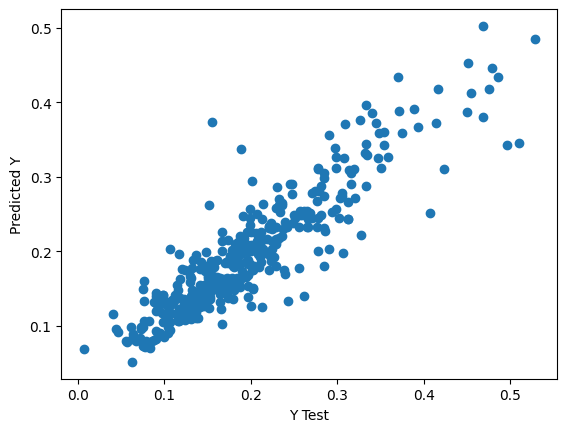

In [155]:
plt.scatter(y_test,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

# Prediction & Submission


In [156]:
predictor_cols = ['Id', 'OverallQual', 'YearBuilt', 'YearRemodAdd', '1stFlrSF',
                           'TotRmsAbvGrd', 'GarageArea', 'KitchenQual', 'BsmtQual',
                           'SaleCondition', 'SaleType', 'CentralAir']

In [157]:
train_X= train_df[predictor_cols]

In [158]:
test_X = test_df[predictor_cols]

In [159]:
predictions = gb_model.predict(test_df)

In [160]:
print(predictions)

[0.13028091 0.14862936 0.14625723 ... 0.15169692 0.09714841 0.24599084]


In [161]:
my_submission = pd.DataFrame({'Id': test_df.Id, 'SalePrice': predictions})

my_submission.to_csv('mysubmission.csv', index=False)